# Single Parent Population
## sixth
### 00/03/04

More accurate critical exponent estimation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Poisson distribution for number of childeren
The distrbution is discrete. It has been used for this purpose and its only parameter $\lambda$ makes sense!

In [2]:
#Poisson distribution assumption

def poisson_next_gen(n, lam):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.poisson(lam, 1))
        n_next += inf_num
        #if you need to assume logic range
#         if inf_num < 10:
#             n_next +=inf_num
    return n_next

### Critical value of $\lambda$ average of children number

In [5]:
#does it extinc?

def extinc(pop_0, lam):
    pop  = []
    time = []
    pop.append(pop_0)
    
    i = 0
    while 1:
        pop.append(poisson_next_gen(pop[i], lam))
        i += 1
        
        if pop[i] < 0.01 * pop[0]:
            return 1
        if pop[i] > 15 * pop[0]:
            return 0

In [8]:
#probability of extinction

def ext_prob(pop_0, lam):
    samples = 100
    extinctions = 0
    for s in range(samples):
        extinctions += extinc(pop_0, lam)

    extinction_probability = extinctions / samples

    return extinction_probability

Wall time: 1h 11min 9s


Text(0.5, 0, '$\\lambda$')

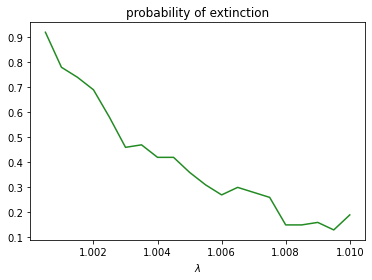

In [9]:
%%time

lam_mat     = np.arange(1.0005, 1.01, 0.0005)
probability = np.zeros(np.size(lam_mat)) 

pop_0 = 100

for i in range(np.size(lam_mat)):
    probability[i] = ext_prob(pop_0, lam_mat[i])
    
    
plt.plot(lam_mat, probability, c = 'forestgreen')
plt.title("probability of extinction")
plt.xlabel("$\lambda$")


Text(0.5, 0, '$\\lambda$')

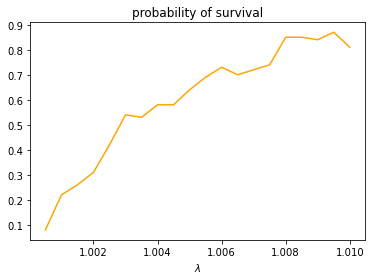

In [10]:
plt.plot(lam_mat, (1 - probability), c = 'orange')
plt.title("probability of survival")
plt.xlabel("$\lambda$")

# plt.savefig("survival probability.png")

We know that the size of the such a system is number of generation. well, we have seen above that the initial population size works like number of generation. It's not unexpected.

In [11]:
print(1-probability,'\n', lam_mat, np.size(lam_mat))
# print(1-probability[21:29],'\n', lam_mat[21:29])

[0.08 0.22 0.26 0.31 0.42 0.54 0.53 0.58 0.58 0.64 0.69 0.73 0.7  0.72
 0.74 0.85 0.85 0.84 0.87 0.81] 
 [1.0005 1.001  1.0015 1.002  1.0025 1.003  1.0035 1.004  1.0045 1.005
 1.0055 1.006  1.0065 1.007  1.0075 1.008  1.0085 1.009  1.0095 1.01  ] 20


In [12]:
fit = np.polyfit(np.log(lam_mat - 1.0), np.log(1-probability), 1)
#previous calculation \beta = -4.38554695
fit

array([0.71584666, 3.28909755])

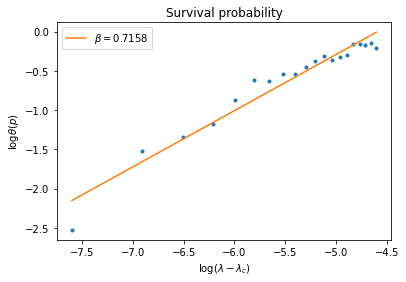

In [14]:
plt.plot(np.log(lam_mat - 1), np.log(1-probability), '.')
plt.plot(np.log(lam_mat - 1), fit[0] * np.log(lam_mat - 1) + fit[1], label = f'$\u03B2={np.round(fit[0], 4)}$')

plt.title("Survival probability")
plt.ylabel("$\log{\u03B8 (p)}$")
plt.xlabel("$\log{(\lambda - \lambda_c)}$")

plt.legend()

# plt.savefig("1st critical exponent.png")

It seems that we can make better estimation by extending extinc function's range. 

### Mean size
We are looking for cumulative population and it is finite for $\lambda$s which extinct and infinite for which don't for sure.


In [18]:
def final_cumulative_population(pop_0, lam):
    pop = []
    pop.append(pop_0)
    i = 0
    while pop[i] > 0:
        pop.append(poisson_next_gen(int(pop[i]), lam))
        i += 1
        
    return np.sum(pop[:])

In [28]:
%%time

lam_mat = np.arange(0.98, 1, 0.0001)
average_cum_pop = []
 

for lam in lam_mat:
    pop_0 = 1
    ave = 1000
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, lam)
    average_cum_pop.append(np.mean(cum_pop[:]))
    

Wall time: 12min 48s


Text(0.5, 0, '$\\lambda$')

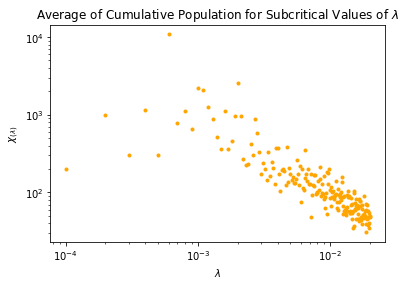

In [41]:
    
plt.loglog(np.abs(lam_mat[:-1]-1), average_cum_pop[:-1], '.', c = 'orange')
plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$1 - \lambda$")

# plt.savefig("2nd critical exponent01.png")

In [32]:
fit2 = np.polyfit(np.log(np.abs(lam_mat[:-1] - 1.0)), np.log(average_cum_pop[:-1]), 1)

fit2

array([-0.8280176 ,  0.75141461])

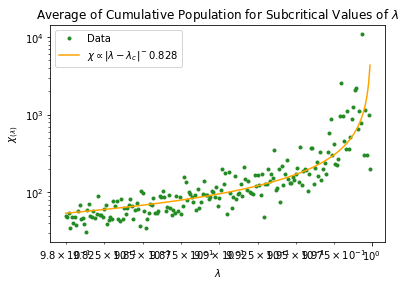

In [35]:
plt.loglog(lam_mat[:-1], average_cum_pop[:-1], '.', c = 'forestgreen', label = 'Data')
plt.loglog(lam_mat[:-1], np.e ** (fit2[0] * np.log(np.abs(lam_mat[:-1] - 1.0)) + fit2[1]), 
         c = 'orange', label = f'$\chi \propto |\lambda - \lambda_c|^{np.round(fit2[0], 3)}$')

plt.title("Average of Cumulative Population for Subcritical Values of $\lambda$")
plt.ylabel("$\chi_{(\lambda)}$")
plt.xlabel("$\lambda$")
# plt.xlim(0, 1.2)
plt.legend()

# plt.savefig("2nd critical exponent02.png")

## $P_\chi (\chi)$ 
Distribution of cluster sizes.

Text(0.5, 1.0, '$\\chi$ size distribution for $λ = $0.9999999999999978')

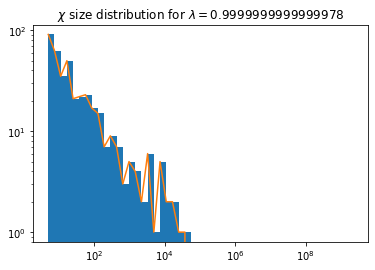

In [61]:
b = 5
a = 1.5
bins = b * a ** np.arange(50)
y, bins, other = plt.hist(cum_pop, bins = bins)
plt.loglog(bins[:-1], y)
plt.title(f"$\chi$ size distribution for $λ = ${lam}")

In [86]:
print(np.size(y[y>0]))

12


In [72]:
fit = np.polyfit(np.log(bins[:23]), np.log(y[:23]), 1)
fit

array([-0.46832769,  4.86852794])

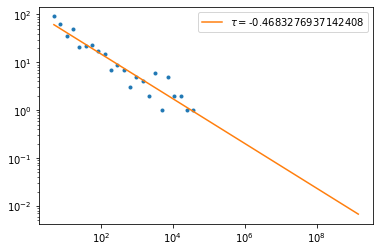

In [82]:
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${fit[0]}')

plt.legend()

In [89]:
%%time

lam_mat = [0.9999999999] #np.arange(0.98, 1, 0.0001)
average_cum_pop = []
 

for lam in lam_mat:
    pop_0 = 1
    ave = 1000
    cum_pop = np.zeros(ave)
    for m in range(ave):
        cum_pop[m] = final_cumulative_population(pop_0, lam)
#     average_cum_pop.append(np.mean(cum_pop[:]))
 

Wall time: 30.2 s


Text(0.5, 1.0, '$\\chi$ size distribution for $λ = $0.9999999999')

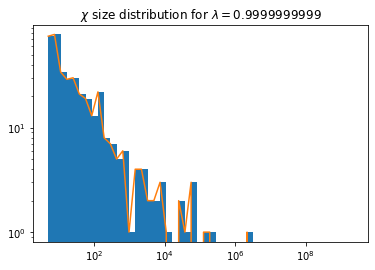

In [90]:
y, bins, other = plt.hist(cum_pop, bins = bins)
plt.loglog(bins[:-1], y)
plt.title(f"$\chi$ size distribution for $λ = ${lam}")

0.0
[-0.52075238  5.00891676]


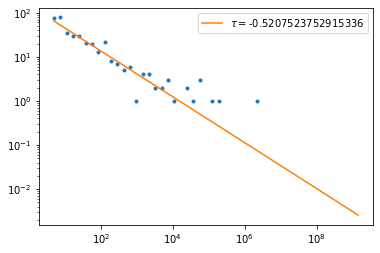

In [114]:
uplim = np.size(y[y>0])
print(y[20])
uplim = 20
fit = np.polyfit(np.log(bins[:uplim]), np.log(y[:uplim]), 1)
print(fit)
plt.loglog(bins[:-1], y, '.')
plt.loglog(bins[:-1], np.exp(fit[1] + fit[0] * np.log(bins[:-1])), label = f'$τ = ${fit[0]}')

plt.legend()

### $P_k(\lambda)$ 
One can ask for the probability $P_k(\lambda)$ that the number of descendants is at least k.

In [113]:
def population(pop_0, lam, generation):
    pop = []
    survival = np.zeros(generation)
    pop.append(pop_0)
    survival[0] = 1
    for t in range(generation):
        new_pop = poisson_next_gen(int(pop[t]), lam)
        pop.append(new_pop)

        if t < generation-1 and new_pop > 0:
            survival[t+1] = 1
        else:
            break
    return survival

Wall time: 10.4 s


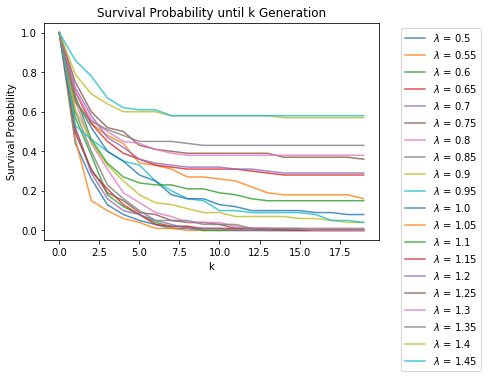

In [149]:
%%time

generation = 20
samples    = 100
pop_0      = 1


lam_mat = np.arange(0.5, 1.5, 0.05)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, lam, generation)
    survival_probability = survival / samples
    plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.savefig("Survival Probability.png")

Wall time: 2min 8s


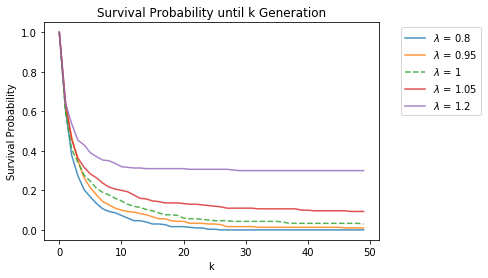

In [165]:
%%time

generation = 50
samples    = 300
pop_0      = 1


lam_mat = [0.8, 0.95, 1, 1.05, 1.2]#np.arange(0.95, 1.05, 0.01)

survival = np.zeros(generation)

for lam in lam_mat:
    survival = 0
    for s in range(samples):
        survival += population(pop_0, lam, generation)
    survival_probability = survival / samples
    if lam == 1:
        plt.plot(survival_probability, '--', alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    else:
        plt.plot(survival_probability, alpha = 0.8, label = f'$\lambda$ = {np.round(lam, 3)}')
    

# plt.plot(np.arange(generation), 1/np.sqrt(np.arange(generation)+1), '--', label = 'Fit')    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Survival Probability until k Generation")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.savefig("3rd critical behavior.png")

Clearly for supercritical curves it tends to a nonzero value and for subcritical ones it decays exponentially. Critical curve has a different behavoir as we expect.
$P_k(\lambda) \propto k^{-\frac{1}{\delta}}$

In [177]:

generation = 100
samples    = 1000
pop_0      = 1

survival = np.zeros(generation)
k        = np.arange(generation) + 1

lam = 1

survival = 0
for s in range(samples):
    survival += population(pop_0, lam, generation)
survival_probability = survival / samples

print(survival_probability)

fit3 = np.polyfit(np.log(k), np.log(survival_probability), 1)
fit3

[1.    0.63  0.459 0.363 0.302 0.246 0.205 0.182 0.158 0.145 0.136 0.129
 0.115 0.11  0.105 0.096 0.091 0.088 0.084 0.077 0.073 0.069 0.067 0.063
 0.062 0.059 0.056 0.055 0.051 0.051 0.051 0.05  0.046 0.046 0.045 0.045
 0.045 0.045 0.045 0.045 0.043 0.043 0.042 0.042 0.041 0.039 0.039 0.039
 0.037 0.037 0.036 0.035 0.033 0.033 0.032 0.032 0.031 0.031 0.027 0.027
 0.026 0.023 0.023 0.021 0.021 0.021 0.021 0.02  0.02  0.02  0.02  0.02
 0.02  0.02  0.02  0.02  0.019 0.019 0.018 0.018 0.018 0.018 0.017 0.017
 0.017 0.017 0.017 0.017 0.017 0.017 0.016 0.016 0.016 0.016 0.016 0.016
 0.016 0.016 0.016 0.016]


array([-0.96948346,  0.32493884])

In [178]:
delta = -1/fit3[0]
delta

1.0314771175636128

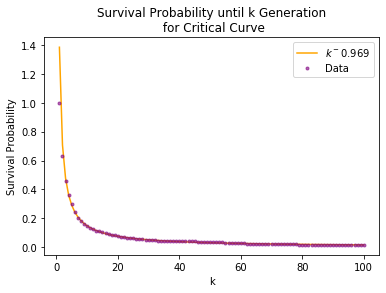

In [189]:
plt.plot(k, np.e ** (fit3[0] * np.log(k) + fit3[1]), c = 'orange', label = f'$k^{np.round(fit3[0], 3)}$' )
plt.plot(k, survival_probability, '.', c = 'purple',alpha = 0.6 , label = 'Data')

plt.title("Survival Probability until k Generation\n for Critical Curve")
plt.ylabel("Survival Probability")
plt.xlabel("k")

plt.legend()

plt.savefig("Critical Curve.png")